In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. Use all features

### 1.1 Loading dataset

In [5]:
ANNOTATIONS_CSV = os.path.join("dataset", "diabetes.csv")

In [6]:
df = pd.read_csv(ANNOTATIONS_CSV)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1.2 Data-preprocessing (Explore Data Analysis - EDA)

In [7]:
num_samples = df.shape[0]
num_features = df.shape[1]

print(f"num_samples = {num_samples}")
print(f"num_features = {num_features}")

num_samples = 768
num_features = 9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
X = df.iloc[:, :df.shape[1] - 1].values
y = df.iloc[:, df.shape[1] - 1].values

In [17]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = VAL_RATIO, random_state = SEED)

In [18]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]

print(f"num_train = {num_train}")
print(f"num_val = {num_val}")

num_train = 614
num_val = 154


### 1.3 Create model

In [23]:
model = LogisticRegression(verbose = 1)

### 1.4 Training model

In [24]:
model.fit(X_train, y_train)

print(f"DONE")

DONE


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


### 1.5 Evaluating model

In [28]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : y_val,
                            "Predicted" : y_hat})
performance.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [29]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.77
acc_val = 0.75


In [33]:
y_hat = model.predict(X_val)
y_hat_proba = model.predict_proba(X_val)

performance = pd.DataFrame({"Actual" : y_val,
                            "Predicted" : y_hat, 
                            "Predicted_class_0" : y_hat_proba[:, 0],
                            "Predicted_class_1" : y_hat_proba[:, 1]})
performance.head()

,Actual,Predicted,Predicted_class_0,Predicted_class_1
0,0,0,0.724240,0.275760
1,0,0,0.803737,0.196263
2,0,0,0.882837,0.117163
3,0,0,0.834643,0.165357
4,0,0,0.539275,0.460725


In [43]:
# confusion matrix in validation 
confusion_matrix_val = confusion_matrix(y_val, model.predict(X_val))
TN = confusion_matrix_val[0, 0]
FP = confusion_matrix_val[0, 1]
FN = confusion_matrix_val[1, 0]
TP = confusion_matrix_val[1, 1]

print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 78
FP = 21
FN = 18
TP = 37


In [44]:
acc_val = (TP + TN) / (TP + FP + FN + TN)
print(f"acc_val = {acc_val:.2f}")

acc_val = 0.75


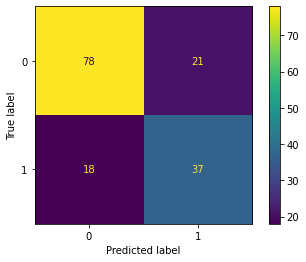

In [38]:
plot_confusion_matrix(model, X_val, y_val)

# 2. Feature Selection

### 2.1 ANOVA-f Statistic (SelectKBest - f_classif())

The scikit-learn machine library provides an implementation of the ANOVA f-test in the f_classif() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

In [51]:
# configure to select all features
fs = SelectKBest(score_func = f_classif, k = 'all')
fs

SelectKBest(k='all')

In [52]:
# learn relationship from data
fs.fit(X, y)
X_fs = fs.transform(X)

In [53]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 39.670227
Feature 1: 213.161752
Feature 2: 3.256950
Feature 3: 4.304381
Feature 4: 13.281108
Feature 5: 71.772072
Feature 6: 23.871300
Feature 7: 46.140611


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

Choose: 
+ Feature 1: 213.161752
+ Feature 5: 71.772072
+ Feature 7: 46.140611

In [57]:
X_remain = X_fs[:, [1, 5, 7]]

### All those step below is the same

In [58]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X_remain, y, test_size = VAL_RATIO, random_state = SEED)

In [59]:
model = LogisticRegression(verbose = 1)

In [60]:
model.fit(X_train, y_train)

print(f"DONE")

DONE


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [61]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : y_val,
                            "Predicted" : y_hat})
performance.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [62]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.77
acc_val = 0.75


### 2.2 Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [64]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [65]:
fs = SelectKBest(score_func = mutual_info_classif, k = 'all')

In [66]:
# learn relationship from data
fs.fit(X, y)
X_fs = fs.transform(X)

In [67]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.058373
Feature 1: 0.130872
Feature 2: 0.003449
Feature 3: 0.035345
Feature 4: 0.041327
Feature 5: 0.083182
Feature 6: 0.012731
Feature 7: 0.062350


Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent.

Choose: 
+ Feature 1: 0.130872
+ Feature 5: 0.083182

In [68]:
X_remain = X_fs[:, [1, 5]]

In [69]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X_remain, y, test_size = VAL_RATIO, random_state = SEED)

In [70]:
model = LogisticRegression(verbose = 1)

In [71]:
model.fit(X_train, y_train)

print(f"DONE")

DONE


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [72]:
y_hat = model.predict(X_val)

performance = pd.DataFrame({"Actual" : y_val,
                            "Predicted" : y_hat})
performance.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [73]:
# calculate acc
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))

print(f"acc_train = {acc_train:.2f}")
print(f"acc_val = {acc_val:.2f}")

acc_train = 0.76
acc_val = 0.77
